# HW 12 - Apache Spark

# Owais Aijaz

# oa07610@st.habib.edu.pk

In [ ]:
!pip install pyspark

In [1]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext, SparkSession

# Configure Spark
conf = SparkConf().setAppName("myAppName").setMaster("local[*]")
# Create a SparkContext
sc = SparkContext(conf=conf)

# from pyspark.sql import SparkSession
sqlContext = SparkSession.builder.appName('abc').getOrCreate()

# Creating RDD (Resilient Distributed Dataset) - fundamental data structure of Spark

In [2]:
products = sc.textFile("/content/SalesData.txt")

In [3]:
products.first()

'ProductID\tName\tProductNumber\tColor\tStandardCost\tListPrice\tSize\tWeight\tProductCategoryID\tProductModelID\tSellStartDate\tSellEndDate\tDiscontinuedDate\tThumbNailPhoto\tThumbnailPhotoFileName\trowguid\tModifiedDate'

In [4]:
print("The data has {} columns".format(len(products.first().split("\t"))))
header = products.first().split("\t")
header

The data has 17 columns


['ProductID',
 'Name',
 'ProductNumber',
 'Color',
 'StandardCost',
 'ListPrice',
 'Size',
 'Weight',
 'ProductCategoryID',
 'ProductModelID',
 'SellStartDate',
 'SellEndDate',
 'DiscontinuedDate',
 'ThumbNailPhoto',
 'ThumbnailPhotoFileName',
 'rowguid',
 'ModifiedDate']

In [5]:
head = products.first()
content = products.filter(lambda line: line != head)

In [6]:
content.first()

'680\tHL Road Frame - Black, 58\tFR-R92B-58\tBlack\t1059.31\t1431.50\t58\t1016.04\t18\t6\t1998-06-01 00:00:00.000\tNULL\tNULL\t0x47494638396150003100F70000000000800000008000808000000080800080008080808080C0C0C0FF000000FF00FFFF000000FFFF00FF00FFFFFFFFFF000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000\tno_image_available_small.gif\t43DD68D6-14A4-461F-9069-55309D90EA7E\t2004-03-11 10:01:36.827'

In [7]:
content.map(lambda line: len(line.split("\t"))).distinct().collect()[0]

17

# Example of RDD using Scala

In [8]:
rdd1 = (content.filter(lambda line: line.split("\t"))
 .map(lambda line: (line.split("\t")))
)
rdd1.take(1)

[['680',
  'HL Road Frame - Black, 58',
  'FR-R92B-58',
  'Black',
  '1059.31',
  '1431.50',
  '58',
  '1016.04',
  '18',
  '6',
  '1998-06-01 00:00:00.000',
  'NULL',
  'NULL',
  '0x47494638396150003100F70000000000800000008000808000000080800080008080808080C0C0C0FF000000FF00FFFF000000FFFF00FF00FFFFFFFFFF000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000',
  'no_image_available_small.gif',
  '43DD68D6-14A4-461F-9069-55309D90EA7E',
  '2004-03-11 10:01:36.827']]

# Converting RDD into Spark Dataframe

In [9]:
df = rdd1.toDF(header)
df.show()

+---------+--------------------+-------------+-----+------------+---------+----+-------+-----------------+--------------+--------------------+--------------------+----------------+--------------------+----------------------+--------------------+--------------------+
|ProductID|                Name|ProductNumber|Color|StandardCost|ListPrice|Size| Weight|ProductCategoryID|ProductModelID|       SellStartDate|         SellEndDate|DiscontinuedDate|      ThumbNailPhoto|ThumbnailPhotoFileName|             rowguid|        ModifiedDate|
+---------+--------------------+-------------+-----+------------+---------+----+-------+-----------------+--------------+--------------------+--------------------+----------------+--------------------+----------------------+--------------------+--------------------+
|      680|HL Road Frame - B...|   FR-R92B-58|Black|     1059.31|  1431.50|  58|1016.04|               18|             6|1998-06-01 00:00:...|                NULL|            NULL|0x474946383961500..

# Using Two Different Code/Syntax
## Spark Dataframe syntax and SQL Table syntax

### Spark Dataframe syntax

In [10]:
# selecting two columns Name and Weight from original dataframe and convert into their proper datatype. Default is string
spark_df = df.select(df.Name, df.Weight.cast("float"))
spark_df.show(5, truncate=False)

+-------------------------+-------+
|Name                     |Weight |
+-------------------------+-------+
|HL Road Frame - Black, 58|1016.04|
|HL Road Frame - Red, 58  |1016.04|
|Sport-100 Helmet, Red    |NULL   |
|Sport-100 Helmet, Black  |NULL   |
|Mountain Bike Socks, M   |NULL   |
+-------------------------+-------+
only showing top 5 rows



### SQL Table syntax
First convert the original Spark Dataframe df into SQL Table and then write SQL syntax

In [11]:
# convert the original Spark Dataframe df into SQL Table
df.createOrReplaceTempView("df_table")
# write SQL query syntax
sqlContext.sql(" SELECT Name, cast(Weight as float) FROM df_table limit 5").show(truncate=False)

+-------------------------+-------+
|Name                     |Weight |
+-------------------------+-------+
|HL Road Frame - Black, 58|1016.04|
|HL Road Frame - Red, 58  |1016.04|
|Sport-100 Helmet, Red    |NULL   |
|Sport-100 Helmet, Black  |NULL   |
|Mountain Bike Socks, M   |NULL   |
+-------------------------+-------+



## Write your solutions using Spark Dataframe syntax and Spark SQL syntax. Your output should match with the RDD output

#### 1. Find the names and weight of the top 15 products by weight. Sort weight by descending order.

##### Using RDD

In [12]:
(content.filter(lambda line: line.split("\t")[7] != "NULL")
 .map(lambda line: (line.split("\t")[1], float(line.split("\t")[7])))
                     .takeOrdered(15, lambda x : -x[1])
                    )

[('Touring-3000 Blue, 62', 13607.7),
 ('Touring-3000 Yellow, 62', 13607.7),
 ('Touring-3000 Blue, 58', 13562.34),
 ('Touring-3000 Yellow, 58', 13512.45),
 ('Touring-3000 Blue, 54', 13462.55),
 ('Touring-3000 Yellow, 54', 13344.62),
 ('Touring-3000 Yellow, 50', 13213.08),
 ('Touring-3000 Blue, 50', 13213.08),
 ('Touring-3000 Yellow, 44', 13049.78),
 ('Touring-3000 Blue, 44', 13049.78),
 ('Mountain-500 Silver, 52', 13008.96),
 ('Mountain-500 Black, 52', 13008.96),
 ('Mountain-500 Silver, 48', 12891.03),
 ('Mountain-500 Black, 48', 12891.03),
 ('Mountain-500 Silver, 44', 12759.49)]

##### Using Spark DataFrame

In [14]:
spark_df = df.select(df.Name, df.Weight.cast("float"))

#Sort by Weight in descending order and take the top 15 rows
top_15_products_df = spark_df.orderBy(spark_df.Weight.desc()).limit(15)

#Show the result
top_15_products_df.show(truncate=False)

+-----------------------+--------+
|Name                   |Weight  |
+-----------------------+--------+
|Touring-3000 Yellow, 62|13607.7 |
|Touring-3000 Blue, 62  |13607.7 |
|Touring-3000 Blue, 58  |13562.34|
|Touring-3000 Yellow, 58|13512.45|
|Touring-3000 Blue, 54  |13462.55|
|Touring-3000 Yellow, 54|13344.62|
|Touring-3000 Yellow, 50|13213.08|
|Touring-3000 Blue, 50  |13213.08|
|Touring-3000 Yellow, 44|13049.78|
|Touring-3000 Blue, 44  |13049.78|
|Mountain-500 Silver, 52|13008.96|
|Mountain-500 Black, 52 |13008.96|
|Mountain-500 Silver, 48|12891.03|
|Mountain-500 Black, 48 |12891.03|
|Mountain-500 Silver, 44|12759.49|
+-----------------------+--------+



##### Using Spark SQL

In [15]:
#Convert the original DataFrame into a SQL table
df.createOrReplaceTempView("df_table")

#Write SQL query to select Name and Weight, sorted by Weight in descending order
sql_query = """
SELECT Name, CAST(Weight AS FLOAT) AS Weight
FROM df_table
WHERE Weight != 'NULL'
ORDER BY Weight DESC
LIMIT 15
"""

#Execute the SQL query and show the results
sqlContext.sql(sql_query).show(truncate=False)

+-----------------------+--------+
|Name                   |Weight  |
+-----------------------+--------+
|Touring-3000 Yellow, 62|13607.7 |
|Touring-3000 Blue, 62  |13607.7 |
|Touring-3000 Blue, 58  |13562.34|
|Touring-3000 Yellow, 58|13512.45|
|Touring-3000 Blue, 54  |13462.55|
|Touring-3000 Yellow, 54|13344.62|
|Touring-3000 Yellow, 50|13213.08|
|Touring-3000 Blue, 50  |13213.08|
|Touring-3000 Yellow, 44|13049.78|
|Touring-3000 Blue, 44  |13049.78|
|Mountain-500 Silver, 52|13008.96|
|Mountain-500 Black, 52 |13008.96|
|Mountain-500 Silver, 48|12891.03|
|Mountain-500 Black, 48 |12891.03|
|Mountain-500 Silver, 44|12759.49|
+-----------------------+--------+



#### 2. Retrieve product details (name, color, size, product model ID) for products where the product model ID is 5

##### Using RDD

In [16]:
(content.filter(lambda line:line.split("\t")[9]=="5")
 .map(lambda line: (line.split("\t")[1],line.split("\t")[3], line.split("\t")[6], line.split("\t")[9])).collect()
)

[('HL Mountain Frame - Silver, 42', 'Silver', '42', '5'),
 ('HL Mountain Frame - Silver, 44', 'Silver', '44', '5'),
 ('HL Mountain Frame - Silver, 48', 'Silver', '48', '5'),
 ('HL Mountain Frame - Silver, 46', 'Silver', '46', '5'),
 ('HL Mountain Frame - Black, 42', 'Black', '42', '5'),
 ('HL Mountain Frame - Black, 44', 'Black', '44', '5'),
 ('HL Mountain Frame - Black, 48', 'Black', '48', '5'),
 ('HL Mountain Frame - Black, 46', 'Black', '46', '5'),
 ('HL Mountain Frame - Black, 38', 'Black', '38', '5'),
 ('HL Mountain Frame - Silver, 38', 'Silver', '38', '5')]

##### Using Spark Dataframe

In [17]:
#Filter products where ProductModelID is 5
filtered_df = df.filter(df.ProductModelID == 5)
result_df = filtered_df.select(df.Name, df.Color, df.Size, df.ProductModelID)

#Show the result
result_df.show(truncate=False)

+------------------------------+------+----+--------------+
|Name                          |Color |Size|ProductModelID|
+------------------------------+------+----+--------------+
|HL Mountain Frame - Silver, 42|Silver|42  |5             |
|HL Mountain Frame - Silver, 44|Silver|44  |5             |
|HL Mountain Frame - Silver, 48|Silver|48  |5             |
|HL Mountain Frame - Silver, 46|Silver|46  |5             |
|HL Mountain Frame - Black, 42 |Black |42  |5             |
|HL Mountain Frame - Black, 44 |Black |44  |5             |
|HL Mountain Frame - Black, 48 |Black |48  |5             |
|HL Mountain Frame - Black, 46 |Black |46  |5             |
|HL Mountain Frame - Black, 38 |Black |38  |5             |
|HL Mountain Frame - Silver, 38|Silver|38  |5             |
+------------------------------+------+----+--------------+



##### Using Spark SQL

In [18]:
#Create a temporary SQL view
df.createOrReplaceTempView("df_table")

#SQL query to filter and select the required columns
sql_query = """
SELECT Name, Color, Size, ProductModelID
FROM df_table
WHERE ProductModelID = 5
"""

sqlContext.sql(sql_query).show(truncate=False)

+------------------------------+------+----+--------------+
|Name                          |Color |Size|ProductModelID|
+------------------------------+------+----+--------------+
|HL Mountain Frame - Silver, 42|Silver|42  |5             |
|HL Mountain Frame - Silver, 44|Silver|44  |5             |
|HL Mountain Frame - Silver, 48|Silver|48  |5             |
|HL Mountain Frame - Silver, 46|Silver|46  |5             |
|HL Mountain Frame - Black, 42 |Black |42  |5             |
|HL Mountain Frame - Black, 44 |Black |44  |5             |
|HL Mountain Frame - Black, 48 |Black |48  |5             |
|HL Mountain Frame - Black, 46 |Black |46  |5             |
|HL Mountain Frame - Black, 38 |Black |38  |5             |
|HL Mountain Frame - Silver, 38|Silver|38  |5             |
+------------------------------+------+----+--------------+



#### 3. Retrieve the name and product number of the products that have a color of 'black', 'red', or 'white' and a size of 'S' or 'M'

##### Using RDD

In [19]:
colors = ["White","Black","Red"]
sizes = ["S","M"]

(content.filter(lambda line: line.split("\t")[6] in sizes)
.filter(lambda line: line.split("\t")[3] in colors)
.map(lambda line: (line.split("\t")[1],line.split("\t")[2], line.split("\t")[3],line.split("\t")[6]))
 .collect()
)

[('Mountain Bike Socks, M', 'SO-B909-M', 'White', 'M'),
 ("Men's Sports Shorts, S", 'SH-M897-S', 'Black', 'S'),
 ("Men's Sports Shorts, M", 'SH-M897-M', 'Black', 'M'),
 ("Women's Tights, S", 'TG-W091-S', 'Black', 'S'),
 ("Women's Tights, M", 'TG-W091-M', 'Black', 'M'),
 ('Half-Finger Gloves, S', 'GL-H102-S', 'Black', 'S'),
 ('Half-Finger Gloves, M', 'GL-H102-M', 'Black', 'M'),
 ('Full-Finger Gloves, S', 'GL-F110-S', 'Black', 'S'),
 ('Full-Finger Gloves, M', 'GL-F110-M', 'Black', 'M'),
 ("Women's Mountain Shorts, S", 'SH-W890-S', 'Black', 'S'),
 ("Women's Mountain Shorts, M", 'SH-W890-M', 'Black', 'M'),
 ('Racing Socks, M', 'SO-R809-M', 'White', 'M')]

##### Using Spark Dataframe

In [20]:
colors = ["Black", "Red", "White"]
sizes = ["S", "M"]

# Filter products by color and size, and select the required columns
filtered_df = df.filter(df.Color.isin(colors) & df.Size.isin(sizes))
result_df = filtered_df.select(df.Name, df.ProductNumber)

result_df.show(truncate=False)

+--------------------------+-------------+
|Name                      |ProductNumber|
+--------------------------+-------------+
|Mountain Bike Socks, M    |SO-B909-M    |
|Men's Sports Shorts, S    |SH-M897-S    |
|Men's Sports Shorts, M    |SH-M897-M    |
|Women's Tights, S         |TG-W091-S    |
|Women's Tights, M         |TG-W091-M    |
|Half-Finger Gloves, S     |GL-H102-S    |
|Half-Finger Gloves, M     |GL-H102-M    |
|Full-Finger Gloves, S     |GL-F110-S    |
|Full-Finger Gloves, M     |GL-F110-M    |
|Women's Mountain Shorts, S|SH-W890-S    |
|Women's Mountain Shorts, M|SH-W890-M    |
|Racing Socks, M           |SO-R809-M    |
+--------------------------+-------------+



##### Using Spark SQL

In [21]:
#Create a temporary SQL view
df.createOrReplaceTempView("df_table")

#SQL query to filter by color and size and select the required columns
sql_query = """
SELECT Name, ProductNumber
FROM df_table
WHERE Color IN ('Black', 'Red', 'White')
  AND Size IN ('S', 'M')
"""

sqlContext.sql(sql_query).show(truncate=False)

+--------------------------+-------------+
|Name                      |ProductNumber|
+--------------------------+-------------+
|Mountain Bike Socks, M    |SO-B909-M    |
|Men's Sports Shorts, S    |SH-M897-S    |
|Men's Sports Shorts, M    |SH-M897-M    |
|Women's Tights, S         |TG-W091-S    |
|Women's Tights, M         |TG-W091-M    |
|Half-Finger Gloves, S     |GL-H102-S    |
|Half-Finger Gloves, M     |GL-H102-M    |
|Full-Finger Gloves, S     |GL-F110-S    |
|Full-Finger Gloves, M     |GL-F110-M    |
|Women's Mountain Shorts, S|SH-W890-S    |
|Women's Mountain Shorts, M|SH-W890-M    |
|Racing Socks, M           |SO-R809-M    |
+--------------------------+-------------+



#### 4. Retrieve the product name, product number, color and list price of products whose product number begins with 'BK-'. Retrieve only 15 records and Sort the price in descending order

##### Using RDD

In [22]:
(content.filter(lambda line: "BK" in line.split("\t")[2])
 .map(lambda line: (line.split("\t")[1], line.split("\t")[2], line.split("\t")[3], float(line.split("\t")[5])))
.takeOrdered(15, lambda x: -x[3]))

[('Road-150 Red, 62', 'BK-R93R-62', 'Red', 3578.27),
 ('Road-150 Red, 44', 'BK-R93R-44', 'Red', 3578.27),
 ('Road-150 Red, 48', 'BK-R93R-48', 'Red', 3578.27),
 ('Road-150 Red, 52', 'BK-R93R-52', 'Red', 3578.27),
 ('Road-150 Red, 56', 'BK-R93R-56', 'Red', 3578.27),
 ('Mountain-100 Silver, 38', 'BK-M82S-38', 'Silver', 3399.99),
 ('Mountain-100 Silver, 42', 'BK-M82S-42', 'Silver', 3399.99),
 ('Mountain-100 Silver, 44', 'BK-M82S-44', 'Silver', 3399.99),
 ('Mountain-100 Silver, 48', 'BK-M82S-48', 'Silver', 3399.99),
 ('Mountain-100 Black, 38', 'BK-M82B-38', 'Black', 3374.99),
 ('Mountain-100 Black, 42', 'BK-M82B-42', 'Black', 3374.99),
 ('Mountain-100 Black, 44', 'BK-M82B-44', 'Black', 3374.99),
 ('Mountain-100 Black, 48', 'BK-M82B-48', 'Black', 3374.99),
 ('Road-250 Red, 44', 'BK-R89R-44', 'Red', 2443.35),
 ('Road-250 Red, 48', 'BK-R89R-48', 'Red', 2443.35)]

##### Using Spark Dataframe

In [23]:
#Filter products whose product number starts with 'BK-' and select relevant columns
filtered_df = df.filter(df.ProductNumber.startswith("BK-"))

#Select columns and sort by ListPrice in descending order
result_df = filtered_df.select(df.Name, df.ProductNumber, df.Color, df.ListPrice.cast("float")) \
                       .orderBy(df.ListPrice.desc()) \
                       .limit(15)

result_df.show(truncate=False)

+-------------------------+-------------+------+---------+
|Name                     |ProductNumber|Color |ListPrice|
+-------------------------+-------------+------+---------+
|Road-650 Red, 52         |BK-R50R-52   |Red   |782.99   |
|Road-650 Black, 58       |BK-R50B-58   |Black |782.99   |
|Road-650 Red, 48         |BK-R50R-48   |Red   |782.99   |
|Road-650 Red, 58         |BK-R50R-58   |Red   |782.99   |
|Road-650 Red, 60         |BK-R50R-60   |Red   |782.99   |
|Road-650 Red, 62         |BK-R50R-62   |Red   |782.99   |
|Road-650 Red, 44         |BK-R50R-44   |Red   |782.99   |
|Road-650 Black, 52       |BK-R50B-52   |Black |782.99   |
|Road-650 Black, 60       |BK-R50B-60   |Black |782.99   |
|Road-650 Black, 62       |BK-R50B-62   |Black |782.99   |
|Road-650 Black, 44       |BK-R50B-44   |Black |782.99   |
|Road-650 Black, 48       |BK-R50B-48   |Black |782.99   |
|Mountain-400-W Silver, 38|BK-M38S-38   |Silver|769.49   |
|Mountain-400-W Silver, 40|BK-M38S-40   |Silver|769.49  

##### Using Spark SQL

In [24]:
#Create a temporary SQL view
df.createOrReplaceTempView("df_table")

#SQL query to filter by product number and sort by ListPrice
sql_query = """
SELECT Name, ProductNumber, Color, CAST(ListPrice AS FLOAT) AS ListPrice
FROM df_table
WHERE ProductNumber LIKE 'BK-%'
ORDER BY ListPrice DESC
LIMIT 15
"""

sqlContext.sql(sql_query).show(truncate=False)

+-----------------------+-------------+------+---------+
|Name                   |ProductNumber|Color |ListPrice|
+-----------------------+-------------+------+---------+
|Road-150 Red, 62       |BK-R93R-62   |Red   |3578.27  |
|Road-150 Red, 44       |BK-R93R-44   |Red   |3578.27  |
|Road-150 Red, 48       |BK-R93R-48   |Red   |3578.27  |
|Road-150 Red, 52       |BK-R93R-52   |Red   |3578.27  |
|Road-150 Red, 56       |BK-R93R-56   |Red   |3578.27  |
|Mountain-100 Silver, 44|BK-M82S-44   |Silver|3399.99  |
|Mountain-100 Silver, 48|BK-M82S-48   |Silver|3399.99  |
|Mountain-100 Silver, 38|BK-M82S-38   |Silver|3399.99  |
|Mountain-100 Silver, 42|BK-M82S-42   |Silver|3399.99  |
|Mountain-100 Black, 38 |BK-M82B-38   |Black |3374.99  |
|Mountain-100 Black, 42 |BK-M82B-42   |Black |3374.99  |
|Mountain-100 Black, 44 |BK-M82B-44   |Black |3374.99  |
|Mountain-100 Black, 48 |BK-M82B-48   |Black |3374.99  |
|Road-250 Red, 44       |BK-R89R-44   |Red   |2443.35  |
|Road-250 Red, 48       |BK-R89

#### 5. Visualize Average List Price per Color and Average List Price per Size. Discuss/Explain your results.

In [25]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pyspark.sql import functions as F
%matplotlib inline

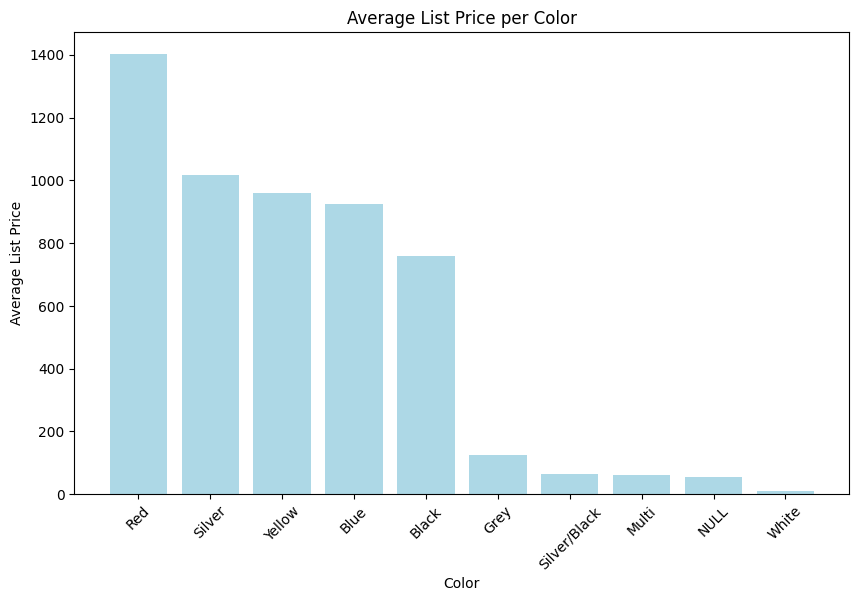

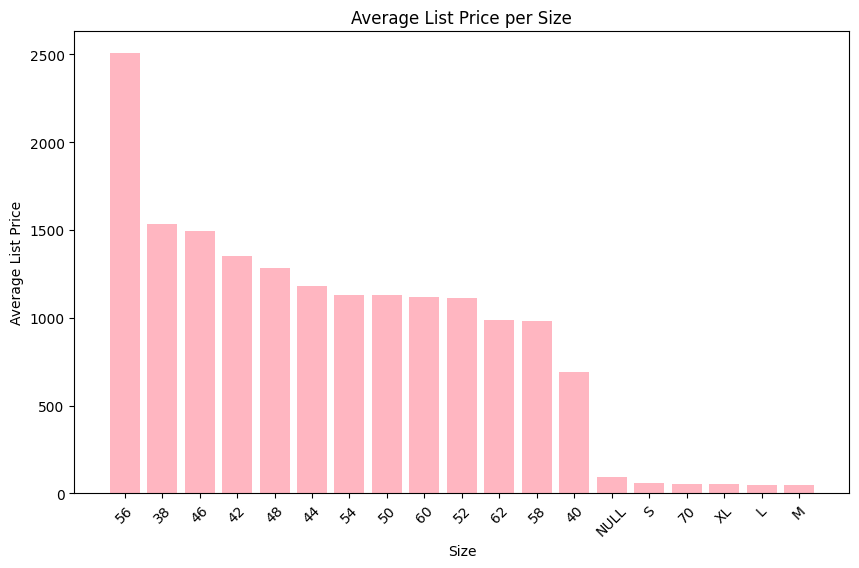

In [32]:
# Group by Color and Size, and calculate average ListPrice
avg_price_color_df = df.groupBy("Color").agg(F.avg("ListPrice").alias("AvgListPrice"))
avg_price_size_df = df.groupBy("Size").agg(F.avg("ListPrice").alias("AvgListPrice"))

# Convert to Pandas DataFrame for visualization
avg_price_color_pd = avg_price_color_df.toPandas()
avg_price_size_pd = avg_price_size_df.toPandas()

#Sorting
avg_price_color_pd = avg_price_color_pd.sort_values(by='AvgListPrice', ascending=False)
avg_price_size_pd = avg_price_size_pd.sort_values(by='AvgListPrice', ascending=False)

# Plotting
import matplotlib.pyplot as plt

# Average List Price per Color
plt.figure(figsize=(10, 6))
plt.bar(avg_price_color_pd['Color'], avg_price_color_pd['AvgListPrice'], color='lightblue')
plt.title('Average List Price per Color')
plt.xlabel('Color')
plt.ylabel('Average List Price')
plt.xticks(rotation=45)
plt.show()

# Average List Price per Size
plt.figure(figsize=(10, 6))
plt.bar(avg_price_size_pd['Size'], avg_price_size_pd['AvgListPrice'], color='lightpink')
plt.title('Average List Price per Size')
plt.xlabel('Size')
plt.ylabel('Average List Price')
plt.xticks(rotation=45)
plt.show()

#### 6. Visualize Total Count per Size. Discuss/Explain your results.

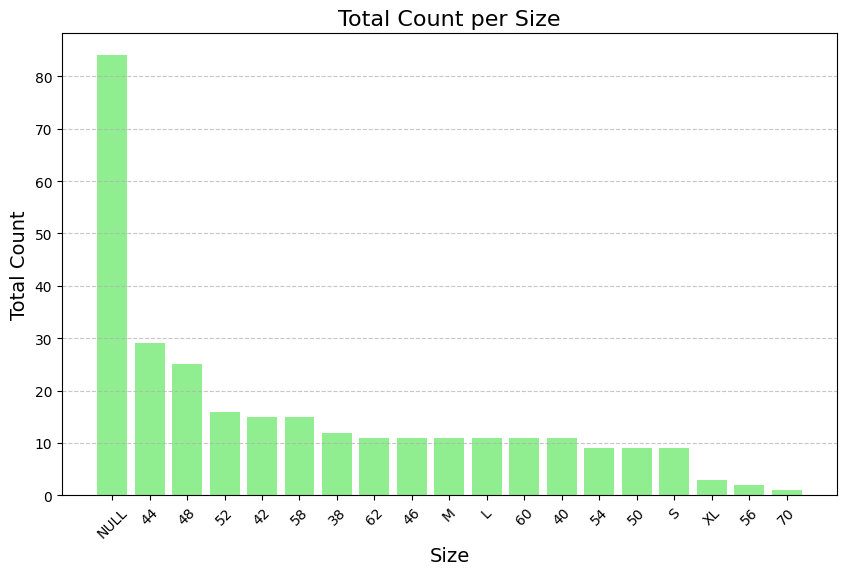

In [30]:
# Group by Size and calculate the total count of each size
count_per_size = df.groupBy("Size").agg(F.count("*").alias("TotalCount"))

# Convert to Pandas DataFrame for visualization
count_per_size_pd = count_per_size.toPandas()

# Sort for better visualization
count_per_size_pd = count_per_size_pd.sort_values("TotalCount", ascending=False)

# Plot Total Count per Size
plt.figure(figsize=(10, 6))
plt.bar(count_per_size_pd["Size"], count_per_size_pd["TotalCount"], color='lightgreen')
plt.title("Total Count per Size", fontsize=16)
plt.xlabel("Size", fontsize=14)
plt.ylabel("Total Count", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Using Machine Learning Library (For Practice)

In [33]:
dfall = df.select(df.Weight.cast("float"), df.Size.cast("float"), df.ListPrice.cast("float"))
dfall.show(5, truncate=False)

+-------+----+---------+
|Weight |Size|ListPrice|
+-------+----+---------+
|1016.04|58.0|1431.5   |
|1016.04|58.0|1431.5   |
|NULL   |NULL|34.99    |
|NULL   |NULL|34.99    |
|NULL   |NULL|9.5      |
+-------+----+---------+
only showing top 5 rows



In [34]:
dfall = dfall.na.drop("any")

In [35]:
feature_columns = dfall.columns[:-1] # here we omit the final column for prediction
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=feature_columns,outputCol="features")

In [36]:
data_2 = assembler.transform(dfall)

In [37]:
data_2.show()

+-------+----+---------+--------------------+
| Weight|Size|ListPrice|            features|
+-------+----+---------+--------------------+
|1016.04|58.0|   1431.5|[1016.03997802734...|
|1016.04|58.0|   1431.5|[1016.03997802734...|
|1043.26|62.0|   1431.5|[1043.26000976562...|
| 961.61|44.0|   1431.5|[961.609985351562...|
| 979.75|48.0|   1431.5|       [979.75,48.0]|
|  997.9|52.0|   1431.5|[997.900024414062...|
|1016.04|56.0|   1431.5|[1016.03997802734...|
|1115.83|58.0|   337.22|[1115.82995605468...|
| 1124.9|60.0|   337.22|[1124.90002441406...|
|1133.98|62.0|   337.22|[1133.97998046875...|
|1052.33|44.0|   337.22|[1052.32995605468...|
|1070.47|48.0|   337.22|[1070.46997070312...|
|1088.62|52.0|   337.22|[1088.61999511718...|
|1115.83|58.0|   337.22|[1115.82995605468...|
| 1124.9|60.0|   337.22|[1124.90002441406...|
|1133.98|62.0|   337.22|[1133.97998046875...|
|1006.97|44.0|   594.83|[1006.96997070312...|
|1025.11|48.0|   594.83|[1025.10998535156...|
|1043.26|52.0|   594.83|[1043.2600

In [38]:
from pyspark.ml.regression import LinearRegression

In [39]:
algo = LinearRegression(featuresCol="features", labelCol="ListPrice")

In [40]:
model = algo.fit(data_2)

In [41]:
evaluation_summary = model.evaluate(data_2)

In [42]:
evaluation_summary.rootMeanSquaredError

862.8415344138203

In [43]:
evaluation_summary.r2

0.10019389704278814